<a href="https://colab.research.google.com/github/NRJaggers/Applied-Stochastic-Processes/blob/main/Applications/5-Costco_Time_Markov_Chains/Costco_Time_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Costco Time Markov Chains


---

## Prompt

Original Prompt can be found [here](https://bookdown.org/kevin_davisross/applied-stochastic-processes/app-queues.html). A copy of the prompt along with the completed exercise can be found under [/Applications](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/Applications).

##Summary

Cars arrive at the Costco gas station at rate $\lambda=1$ car per minute.

There are 3 islands with 2 pumps on each side, for a total of 12 pumps. Label the pumps in the back from left to right as 1, 2, ..., 6, and the pumps in front from left to right as 7, 8, ..., 12.

When cars arrive they join one of 6 queues, one queue for each side of the islands. There is one queue that waits for pumps 1 and 7, one that waits for pumps 2 and 8, and so on. The car first in line in the queue for pumps 1 and 7 will move to whichever one opens up first, similarly for 2 and 8, and so on.

```
 ^       ^ ^       ^ ^       ^
 |       | | Cars  | |       |
 |       | |  out  | |       |

  01|I|02   03|I|04   05|I|06
  07|1|08   09|2|10   11|3|12
 ^       ^ ^       ^ ^       ^
 |       | | Cars  | |       |
 |       | |   in  | |       |
Q1      Q2 Q3     Q4 Q5      Q6
```

There are 3 different types of cars: 30% of cars will only join the queues on the left (to wait for one of the odd numbered pumps), 30% of cars will only join the queues on the right (to wait for an even numbered pump), and the remaining cars will join any queue.

When a car arrives, it will join whichever queue of its type is the shortest. If there is a tie for shortest queue of its type, the car will choose at random among the shortest queue options.
Once a car chooses a queue, it does not switch to another or leave the gas station before completing service.

Assume each pump serves customers at Exponential rate $\mu=0.2$
 cars per minute, independent of the customer type. You can assume that once a car completes service the next car in the queue starts service immediately.

###Part 1

Let $X_i(t)$ denote the number of customers in queue $i=1,\ldots,6$ at time $t$, including any customers in service at the corresponding pumps. The process $X(t)=(X_1(t), \ldots, X_6(t))$ is a vector-valued continuous time Markov chain. Let $S(t) = X_1(t) + \cdots + X_6(t)$ denote the total number of customers in the system at time $t$, including any customers in service.

Note: $t$ is in minutes

Write a program to simulate the customer arrivals and services and the values of $X_i(t)$ over a long time period, say a week. You will use your simulation results to approximate the following items, so consider all parts below when designing your code.

- The long run distribution of the number of cars in the system.

- The long run fraction of time there are no cars in the system.

- The long run average number of customers in the system.

- Any other features of the long run distribution of the number of cars in the system you’re interested in.

- The long run distribution of the amount of time a customer spends in the system.

- The average time a customer spends in the system.

- Any other features of the long run distribution of the amount of time a customer spends in the system you’re interested in

<br>

*Assignment Update*:
The last three bullet points are optional.

###Part 2

Change some features of the set up and investigate how your changes effect the average number of customers in the system, and the average time a customer spends in the system. There are lots of things you can do.

---

## Application

Hypothesis:
I think these pumps can be modeled as birth-death chains. The arrival rate $\lambda$ is greater than the service rate $\mu$ however, that is for the entire gas station. If we split up the arrival rate going into the queues or the pumps, the arrival rate drops below the serivce rate. You can treat pumps independently and add their results up.


In [15]:
pumps = 12
rate_arrival_total = 1
rate_service_pump = 0.2
rate_service_total = 0.2 * pumps

need_left_queue = 0.3
need_right_queue = 0.3
need_either_queue = 0.4

left_queues = 3
right_queues = 3
queues = left_queues + right_queues

rate_arrival_queue = (need_left_queue/left_queues) + (need_either_queue/queues)
rate_service_queue = rate_service_pump*2
if (rate_arrival_queue < rate_service_queue):
  print("arrival rate is less than service rate at queue level")
else:
  print("arrival rate is greater than service rate at queue level")

# Now I am thinking i could have just multiplied the number of pumps by the rate
# of service and checked arrival rate against total pumps rate

# Long run fraction that the queue/station is not busy
pi_0 = (1-(rate_arrival_queue/rate_service_queue))*((rate_arrival_queue/rate_service_queue)**0)
pi_0 = (1-(rate_arrival_total/rate_service_total))*((rate_arrival_total/rate_service_total)**0)
print("Long run fraction not busy:",pi_0)

#Long run average number of customers in the system
L = rate_arrival_total/(rate_service_total-rate_arrival_total)
print("Long run average number of customers:",L)

#Long run average wait time for customers
W = 1/(rate_service_total-rate_arrival_total)
print("Long run average wait time:",W)


arrival rate is less than service rate at queue level
Long run fraction not busy: 0.5833333333333334
Long run average number of customers: 0.7142857142857141
Long run average wait time: 0.7142857142857141


###Part 1

In [1]:
#use this to allow for running R within Python
%load_ext rpy2.ipython

In [7]:
%%R
install.packages('expm')
install.packages('tidyverse')
install.packages("dplyr")
install.packages("tidyr")
install.packages("kableExtra")
install.packages("knitr")


(as ‘lib’ is unspecified)







	‘/tmp/RtmpsewIz4/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpsewIz4/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpsewIz4/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpsewIz4/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpsewIz4/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpsewIz4/downloaded_packages’



In [9]:
%%R
library(expm)
library(tidyverse)
library(dplyr)
library(tidyr)
library(kableExtra)
library(knitr)


Attaching package: ‘expm’



    expm




── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: ‘kableExtra’



    group_rows




In [32]:
%%R
lambda = 0.2

mu = 0.5

n_jumps = 10000

X_t = rep(NA, n_jumps + 1)
W_n = rep(NA, n_jumps + 1)
T_n = rep(NA, n_jumps + 1)

X_t[1] = 0
T_n[1] = 0

for (n in 2:(n_jumps + 1)){
  if (X_t[n - 1] == 0){
    W_n[n - 1] = rexp(1) / lambda
    T_n[n] = T_n[n - 1] + W_n[n - 1]
    X_t[n] = X_t[n - 1] + 1
  } else {
    W_n[n - 1] = rexp(1) / (lambda + mu)
    T_n[n] = T_n[n - 1] + W_n[n - 1]
    X_t[n] = X_t[n - 1] + sample(c(-1, 1), 1, prob = c(mu, lambda))
  }
}

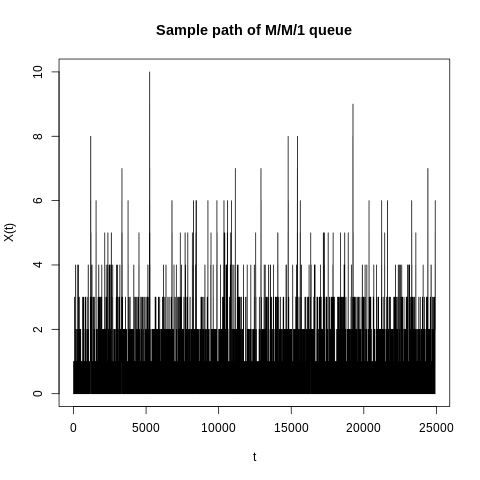

In [33]:
%%R
plot(T_n, X_t,
     type = "s",
     xlab = "t", ylab = "X(t)",
     main = "Sample path of M/M/1 queue")

In [34]:
%%R
long_run_distribution = data.frame(T_n, X_t, W_n) |>
  slice_head(n = n_jumps) |>
  mutate(total_time = sum(W_n)) |>
  group_by(X_t) |>
  summarize(total_time_in_state = sum(W_n),
            total_time = max(total_time),
            fraction_time_in_state = total_time_in_state / total_time)

long_run_distribution |>
  select(X_t, fraction_time_in_state)

# A tibble: 11 × 2
     X_t fraction_time_in_state
   <dbl>                  <dbl>
 1     0              0.593    
 2     1              0.241    
 3     2              0.100    
 4     3              0.0391   
 5     4              0.0157   
 6     5              0.00670  
 7     6              0.00257  
 8     7              0.000729 
 9     8              0.000465 
10     9              0.000258 
11    10              0.0000450


The long run distribution of the number of cars in the system.


The long run fraction of time there are no cars in the system.


The long run average number of customers in the system.

Any other features of the long run distribution of the number of cars in the system you’re interested in.


The long run distribution of the amount of time a customer spends in the system.


The average time a customer spends in the system.


Any other features of the long run distribution of the amount of time a customer spends in the system you’re interested in.

###Part 2